In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("../data/micro_world_139countries.csv", encoding='latin1')

df

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143882,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,142158626,1.327724,2,22.0,2,5,...,4,4,4.0,4,5.0,1,1,0,0.0,2021
143883,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,166233385,0.271210,1,52.0,2,5,...,1,4,4.0,4,5.0,1,2,1,1.0,2021
143884,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,127205071,0.337621,1,47.0,1,1,...,4,4,4.0,4,5.0,1,2,0,0.0,2021
143885,Zimbabwe,ZWE,Sub-Saharan Africa (excluding high income),8633711.0,201016006,2.153500,2,18.0,1,3,...,4,4,4.0,4,4.0,2,2,1,1.0,2021


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 140.5+ MB


In [4]:
null_counts = df.isnull().sum().sort_values(ascending=False)

null_df = pd.DataFrame({
    'Column': null_counts.index,
    'Null Count': null_counts.values
})

null_df['Null Count'] = null_df['Null Count'].astype(int)
pd.set_option('display.max_rows', None)
null_df[null_df['Null Count'] > 0]

,Column,Null Count
0,fin10_1b,143065
1,fin10_1c,143065
2,fin10_1d,143065
3,fin10_1e,143065
4,fin10_1a,143065
5,fin43e,142569
6,fin31b1_China,141866
7,fin34e,141132
8,fin14c_2_China,140768
9,fin14_2_China,140666


In [6]:
df.columns

Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q',
       ...
       'receive_transfers', 'receive_pension', 'receive_agriculture',
       'pay_utilities', 'remittances', 'mobileowner', 'internetaccess',
       'anydigpayment', 'merchantpay_dig', 'year'],
      dtype='object', length=128)

In [43]:
columns_used = ['economy', 'female', 'age', 'inc_q', 'emp_in', 'account', 'borrowed', 'saved', 'receive_wages', 'receive_transfers', 'receive_pension', 'pay_utilities', 'anydigpayment', 'mobileowner', 'internetaccess', 'fin4', 'fin8', 'fin8b', 'fin44a', 'fin44b', 'fin44c', 'fin44d', "fin45"]

df = df[columns_used]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   economy            143887 non-null  object 
 1   female             143887 non-null  int64  
 2   age                143420 non-null  float64
 3   inc_q              143887 non-null  int64  
 4   emp_in             140385 non-null  float64
 5   account            143887 non-null  int64  
 6   borrowed           143887 non-null  int64  
 7   saved              143887 non-null  int64  
 8   receive_wages      143887 non-null  int64  
 9   receive_transfers  143887 non-null  int64  
 10  receive_pension    143887 non-null  int64  
 11  pay_utilities      143887 non-null  int64  
 12  anydigpayment      143887 non-null  int64  
 13  mobileowner        143887 non-null  int64  
 14  internetaccess     143887 non-null  int64  
 15  fin4               72945 non-null   float64
 16  fi

In [44]:
# dropping rows where respondant did not answer one of the target questions
finacial_worry_variables = ['fin44a', 'fin44b', 'fin44c', 'fin44d']

for variable in finacial_worry_variables:
    df = df[df[variable] != 6]

In [45]:
finacial_worry_variables = ['fin44a', 'fin44b', 'fin44c', 'fin44d']

for variable in finacial_worry_variables:
    df[variable] = df[variable].replace({1: 3, 2: 1, 3: 0, 4: 0, 5: 0})


### Construíndo o índice de estresse financeiro

A ideia é utilizar a frequência relativa da pergunta de maiores preocupações, dando assim pesos para as perguntas acerca do nível de preocupações financeiras  ```'fin44a', 'fin44b', 'fin44c', 'fin44d'```. Entretanto, visando aplicar os pesos de forma lógica, utilizou-se da variável ```fin45``` para pegar as frequências e aplicar a lógica inversa. Ou seja, os tipos de preocupações que mais ocorrem tem os menores pesos nos índices. 

In [46]:
freqs = df["fin45"].value_counts().loc[:3]
sum_freqs = sum(freqs)
freqs = dict(sorted(freqs.to_dict().items()))
freqs

{1.0: 21554, 2.0: 44168, 3.0: 17521, 4.0: 17766}

Sabendo que:
- 1 - Preocupações quanto a falta de dinheiro na aposentadoria (fin44a)
- 2 - Preocupações quanto ao pagamento de serviços de saúde (fin44b)
- 3 - Preocupações quanto ao pagamento de contas (fin44c)
- 4 - Preocupações quanto ao pagamento de serviços de educação (fin44d)

Então:
- 3 deve receber peso 0.43
- 4 deve receber peso 0.21
- 1 deve receber peso 0.175
- 2 deve receber peso 0.173

In [47]:
weights = np.array(list(freqs.values())[::-1])/sum_freqs
weights

array([0.17588532, 0.17345979, 0.43726797, 0.21338693])

In [48]:
df['financial_worry'] = df[finacial_worry_variables].values @ weights

In [49]:
df

,economy,female,age,inc_q,emp_in,account,borrowed,saved,receive_wages,receive_transfers,...,internetaccess,fin4,fin8,fin8b,fin44a,fin44b,fin44c,fin44d,fin45,financial_worry
0,Afghanistan,2,43.0,4,1.0,1,1,0,4,4,...,2,NaN,NaN,NaN,3,1,0,0,1.0,0.701116
1,Afghanistan,2,55.0,3,1.0,0,1,0,4,4,...,2,NaN,NaN,NaN,1,3,3,3,3.0,2.648229
2,Afghanistan,1,15.0,2,2.0,0,1,0,4,4,...,2,NaN,NaN,NaN,1,3,3,3,4.0,2.648229
3,Afghanistan,2,23.0,4,1.0,0,0,0,2,4,...,2,NaN,NaN,NaN,1,1,3,1,3.0,1.874536
4,Afghanistan,1,46.0,1,2.0,0,1,0,4,4,...,2,NaN,NaN,NaN,3,1,0,0,1.0,0.701116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143882,Zimbabwe,2,22.0,5,1.0,1,0,1,3,4,...,1,NaN,NaN,NaN,3,3,3,3,3.0,3.000000
143883,Zimbabwe,1,52.0,5,1.0,1,0,1,4,1,...,2,1.0,NaN,NaN,3,3,3,3,2.0,3.000000
143884,Zimbabwe,1,47.0,1,1.0,0,1,0,4,4,...,2,NaN,NaN,NaN,3,3,3,3,3.0,3.000000
143885,Zimbabwe,2,18.0,3,1.0,1,0,0,1,4,...,2,NaN,NaN,NaN,0,3,3,0,3.0,1.832183


In [50]:
df.drop(columns=finacial_worry_variables + ["fin45"], inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143249 entries, 0 to 143886
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   economy            143249 non-null  object 
 1   female             143249 non-null  int64  
 2   age                142792 non-null  float64
 3   inc_q              143249 non-null  int64  
 4   emp_in             139767 non-null  float64
 5   account            143249 non-null  int64  
 6   borrowed           143249 non-null  int64  
 7   saved              143249 non-null  int64  
 8   receive_wages      143249 non-null  int64  
 9   receive_transfers  143249 non-null  int64  
 10  receive_pension    143249 non-null  int64  
 11  pay_utilities      143249 non-null  int64  
 12  anydigpayment      143249 non-null  int64  
 13  mobileowner        143249 non-null  int64  
 14  internetaccess     143249 non-null  int64  
 15  fin4               72698 non-null   float64
 16  fin8   

In [52]:
# consertando variáveis binárias segundo 5 lógicas diferentes
binary_variables_to_be_fixed = ['female', 'emp_in',]

for variable in binary_variables_to_be_fixed:
    df[variable] = df[variable].replace({2: 0})

binary_variables_to_be_fixed = ['receive_wages', 'receive_transfers', 'receive_pension', 'pay_utilities']

for variable in binary_variables_to_be_fixed:
    df[variable] = df[variable].replace({2: 1, 3: 1, 4: 0, 5: 0})

binary_variables_to_be_fixed = ['mobileowner', 'internetaccess', 'fin4', 'fin8']

for variable in binary_variables_to_be_fixed:
    df[variable] = df[variable].replace({2: 0, 3: 1, 4: 1})

df['fin8b'] = df['fin8b'].replace({2: 0, 3: 1, 4: 0})

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143249 entries, 0 to 143886
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   economy            143249 non-null  object 
 1   female             143249 non-null  int64  
 2   age                142792 non-null  float64
 3   inc_q              143249 non-null  int64  
 4   emp_in             139767 non-null  float64
 5   account            143249 non-null  int64  
 6   borrowed           143249 non-null  int64  
 7   saved              143249 non-null  int64  
 8   receive_wages      143249 non-null  int64  
 9   receive_transfers  143249 non-null  int64  
 10  receive_pension    143249 non-null  int64  
 11  pay_utilities      143249 non-null  int64  
 12  anydigpayment      143249 non-null  int64  
 13  mobileowner        143249 non-null  int64  
 14  internetaccess     143249 non-null  int64  
 15  fin4               72698 non-null   float64
 16  fin8   

Para fin4 e fin8, imputarei os valores ausentes como "não", pois a ausência provavelmente significa que o respondente não possui uma conta ou possui apenas uma conta de dinheiro móvel, o que implica que não possui cartão. Isso está alinhado com o padrão de salto da pesquisa, em que não foram questionados os não correntistas (excluindo dinheiro móvel).

Para fin8b, impute os valores ausentes com uma categoria "não aplicável", refletindo que, sem um cartão de crédito, o pagamento integral é irrelevante.

In [54]:
# renomeando variáveis

df = df.rename(columns={'fin4': 'debit_card',
                   'fin8': 'credit_card',
                     'fin8b': 'paid_balance_regularly',
})

In [55]:
df[['debit_card', 'credit_card']] = df[['debit_card', 'credit_card']].fillna(0)
df['paid_balance_regularly'] = df['paid_balance_regularly'].fillna(-1)

In [56]:
#dropando nulos, pois restam poucos
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139364 entries, 0 to 143886
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   economy                 139364 non-null  object 
 1   female                  139364 non-null  int64  
 2   age                     139364 non-null  float64
 3   inc_q                   139364 non-null  int64  
 4   emp_in                  139364 non-null  float64
 5   account                 139364 non-null  int64  
 6   borrowed                139364 non-null  int64  
 7   saved                   139364 non-null  int64  
 8   receive_wages           139364 non-null  int64  
 9   receive_transfers       139364 non-null  int64  
 10  receive_pension         139364 non-null  int64  
 11  pay_utilities           139364 non-null  int64  
 12  anydigpayment           139364 non-null  int64  
 13  mobileowner             139364 non-null  int64  
 14  internetaccess          1

In [57]:
# convertendo variaveis float para int
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
float_columns.remove("financial_worry")
for col in float_columns:
    df[col] = df[col].astype(int)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139364 entries, 0 to 143886
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   economy                 139364 non-null  object 
 1   female                  139364 non-null  int64  
 2   age                     139364 non-null  int64  
 3   inc_q                   139364 non-null  int64  
 4   emp_in                  139364 non-null  int64  
 5   account                 139364 non-null  int64  
 6   borrowed                139364 non-null  int64  
 7   saved                   139364 non-null  int64  
 8   receive_wages           139364 non-null  int64  
 9   receive_transfers       139364 non-null  int64  
 10  receive_pension         139364 non-null  int64  
 11  pay_utilities           139364 non-null  int64  
 12  anydigpayment           139364 non-null  int64  
 13  mobileowner             139364 non-null  int64  
 14  internetaccess          1

In [27]:
df

,economy,female,age,inc_q,emp_in,account,borrowed,saved,receive_wages,receive_transfers,receive_pension,pay_utilities,anydigpayment,mobileowner,internetaccess,debit_card,credit_card,paid_balance_regularly,financial_worry
0,Afghanistan,0,43,4,1,1,1,0,0,0,0,1,1,1,0,0,0,-1,0.701116
1,Afghanistan,0,55,3,1,0,1,0,0,0,0,0,0,1,0,0,0,-1,2.648229
2,Afghanistan,1,15,2,0,0,1,0,0,0,0,0,0,0,0,0,0,-1,2.648229
3,Afghanistan,0,23,4,1,0,0,0,1,0,0,0,0,1,0,0,0,-1,1.874536
4,Afghanistan,1,46,1,0,0,1,0,0,0,0,0,0,0,0,0,0,-1,0.701116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143882,Zimbabwe,0,22,5,1,1,0,1,1,0,0,0,0,1,1,0,0,-1,3.000000
143883,Zimbabwe,1,52,5,1,1,0,1,0,1,0,0,1,1,0,1,0,-1,3.000000
143884,Zimbabwe,1,47,1,1,0,1,0,0,0,0,0,0,1,0,0,0,-1,3.000000
143885,Zimbabwe,0,18,3,1,1,0,0,1,0,0,0,1,0,0,0,0,-1,1.832183


In [59]:
df.to_csv("../data/cleaned_data.csv", index=False)

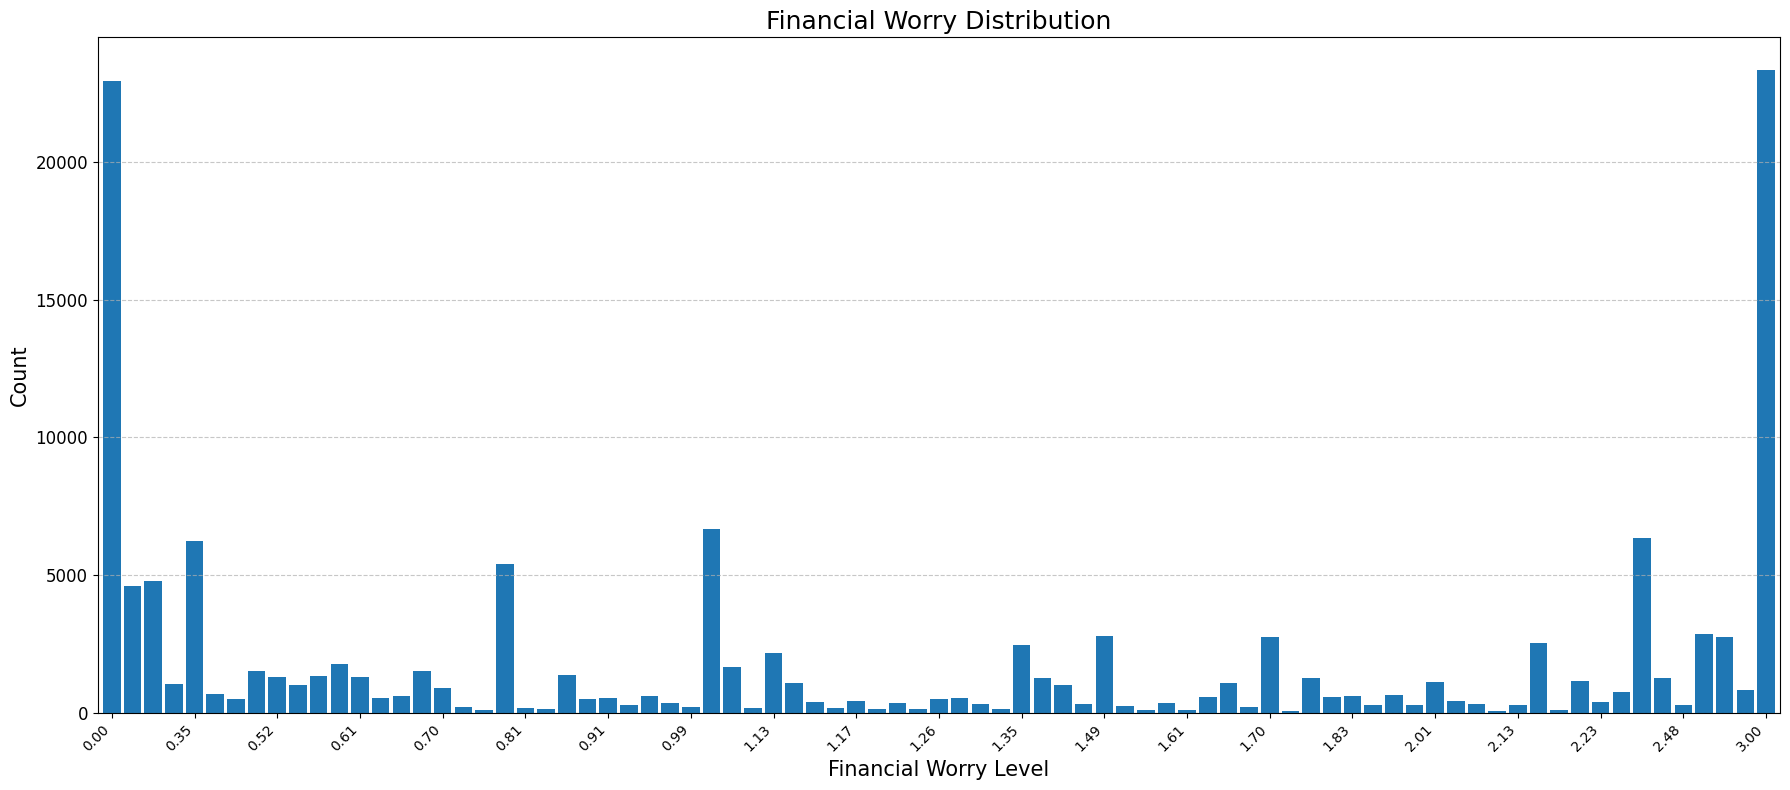

In [60]:
financial_worry_counts = df['financial_worry'].value_counts().sort_index()

plt.figure(figsize=(18, 8))  # Increased figure size for better readability

ax = financial_worry_counts.plot(kind='bar', width=0.85)

plt.title('Financial Worry Distribution', fontsize=18)
plt.xlabel('Financial Worry Level', fontsize=15)
plt.ylabel('Count', fontsize=15)

num_categories = len(financial_worry_counts.index)
tick_positions = np.arange(num_categories) 
tick_labels = [f"{val:.2f}" for val in financial_worry_counts.index] 

if num_categories > 25:
    step = max(1, num_categories // 20) 
    ax.set_xticks(tick_positions[::step])
    ax.set_xticklabels([tick_labels[i] for i in range(0, num_categories, step)], rotation=45, ha='right', fontsize=10)
else:
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=45, ha='right', fontsize=10)

plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

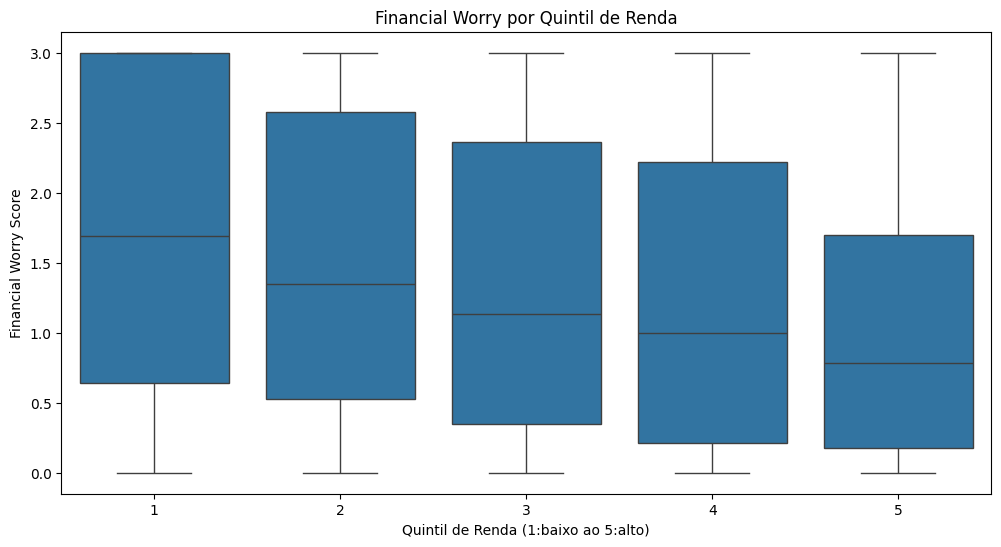

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='inc_q', y='financial_worry', data=df)
plt.title('Financial Worry por Quintil de Renda')
plt.xlabel('Quintil de Renda (1:baixo ao 5:alto)')
plt.ylabel('Financial Worry Score')
plt.show()

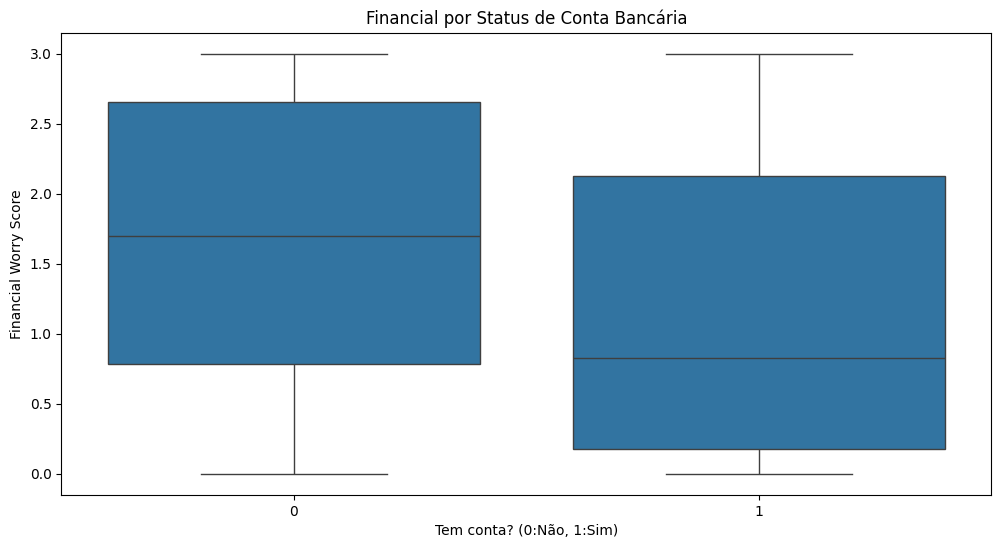

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='account', y='financial_worry', data=df)
plt.title('Financial por Status de Conta Bancária')
plt.xlabel('Tem conta? (0:Não, 1:Sim)')
plt.ylabel('Financial Worry Score')
plt.show()

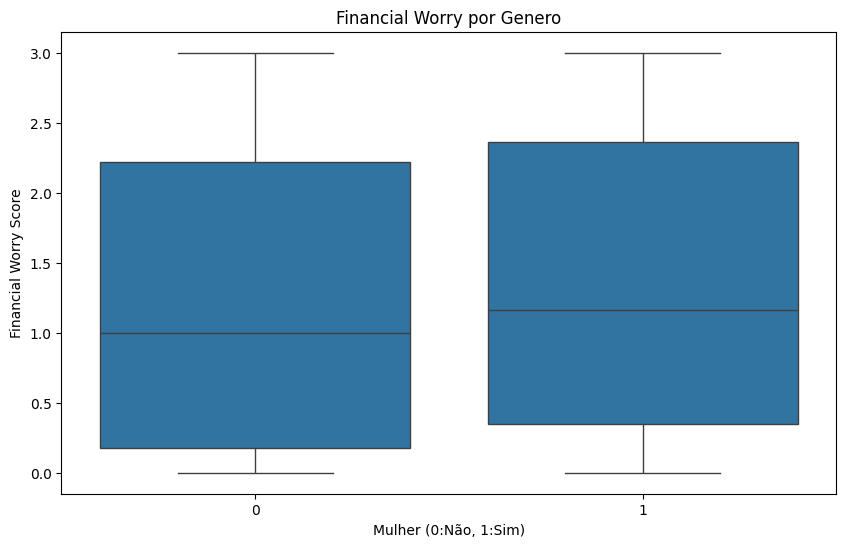

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='female', y='financial_worry', data=df)
plt.title('Financial Worry por Genero')
plt.xlabel('Mulher (0:Não, 1:Sim)')
plt.ylabel('Financial Worry Score')
plt.show()

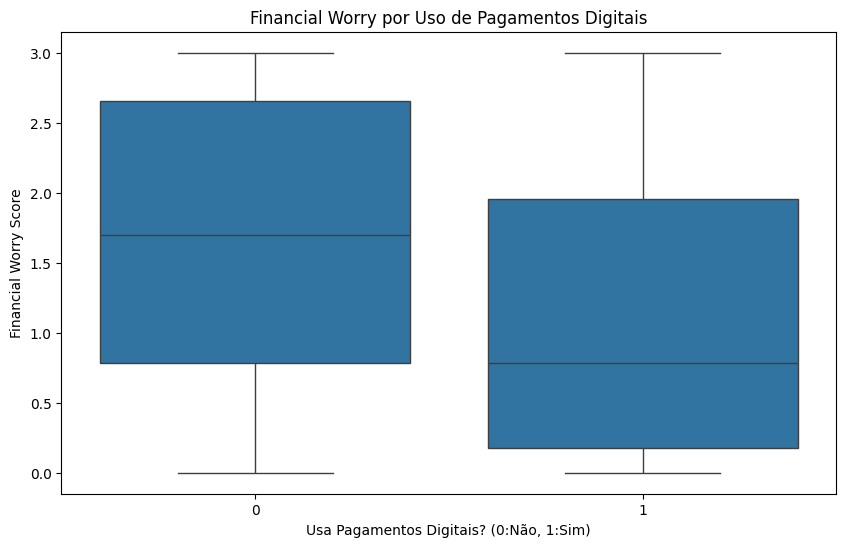

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='anydigpayment', y='financial_worry', data=df)
plt.title('Financial Worry por Uso de Pagamentos Digitais')
plt.xlabel('Usa Pagamentos Digitais? (0:Não, 1:Sim)')
plt.ylabel('Financial Worry Score')
plt.show()

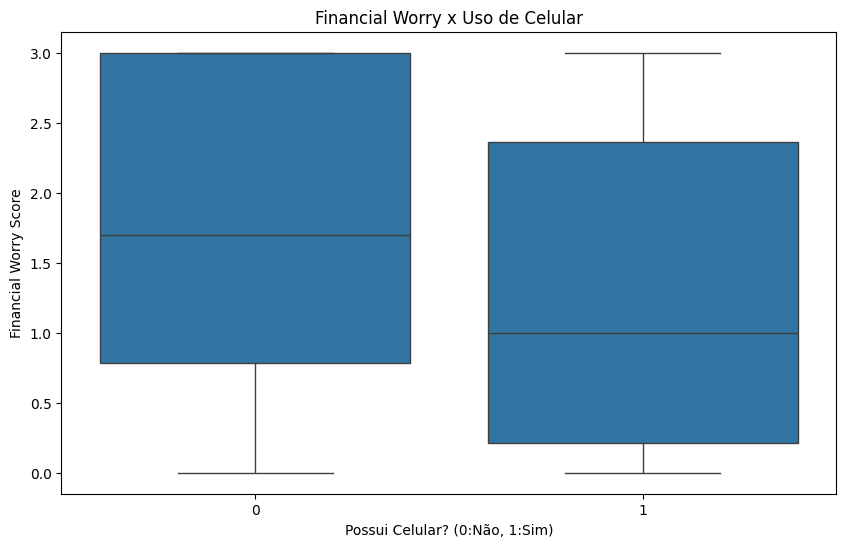

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mobileowner', y='financial_worry', data=df)
plt.title('Financial Worry x Uso de Celular')
plt.xlabel('Possui Celular? (0:Não, 1:Sim)')
plt.ylabel('Financial Worry Score')
plt.show()

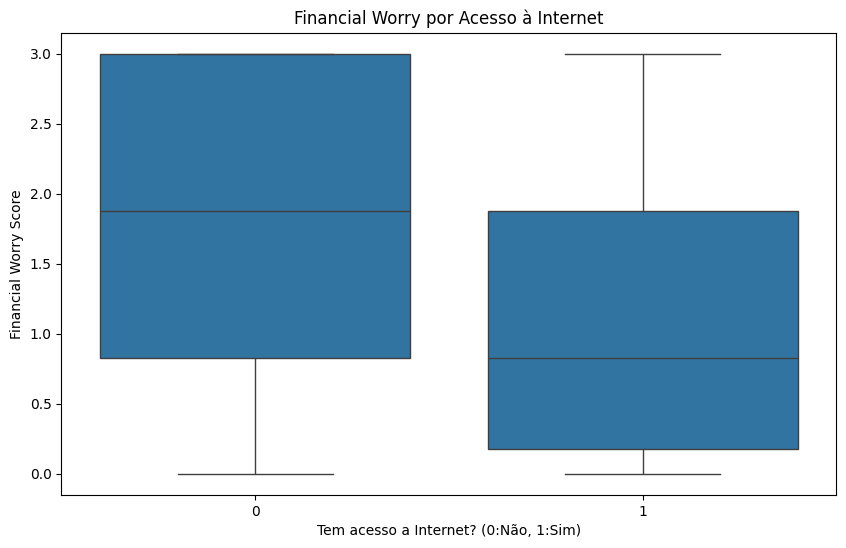

In [31]:
# Financial worry by internet access
plt.figure(figsize=(10, 6))
sns.boxplot(x='internetaccess', y='financial_worry', data=df)
plt.title('Financial Worry por Acesso à Internet')
plt.xlabel('Tem acesso a Internet? (0:Não, 1:Sim)')
plt.ylabel('Financial Worry Score')
plt.show()

C:\Users\Mezzow Tecnologia\AppData\Local\Temp\ipykernel_21060\304015768.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_worry.index, y=region_worry.values, palette='Set2')


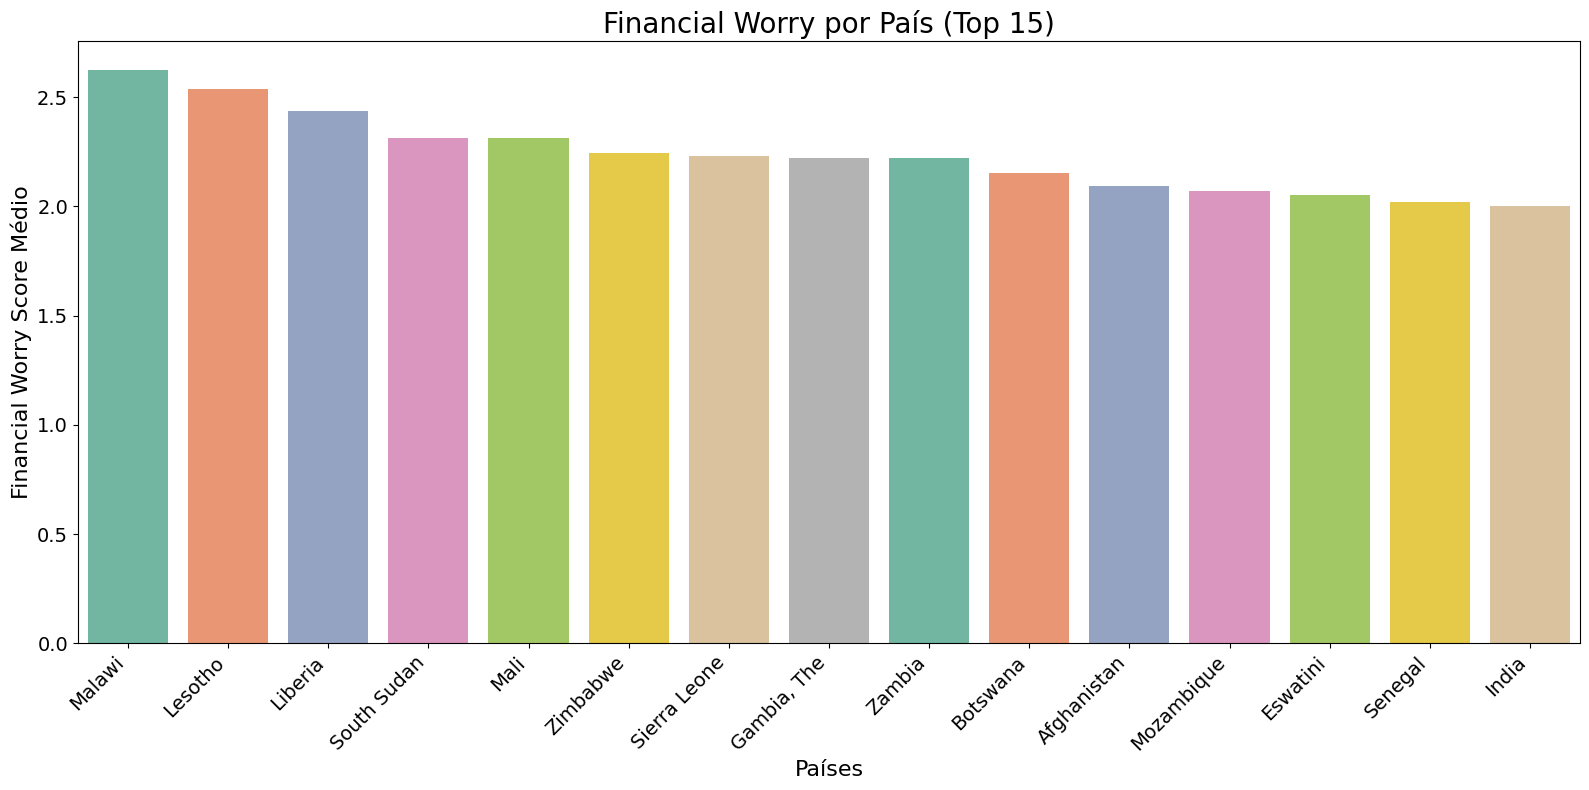

In [32]:
plt.figure(figsize=(16, 8))
region_worry = (
    df.groupby('economy')['financial_worry']
      .mean()
      .sort_values(ascending=False)
      .head(15)
)
sns.barplot(x=region_worry.index, y=region_worry.values, palette='Set2')
plt.title('Financial Worry por País (Top 15)', fontsize=20)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Financial Worry Score Médio', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\Mezzow Tecnologia\AppData\Local\Temp\ipykernel_21060\3402948997.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_worry.index, y=region_worry.values, palette='Set2')


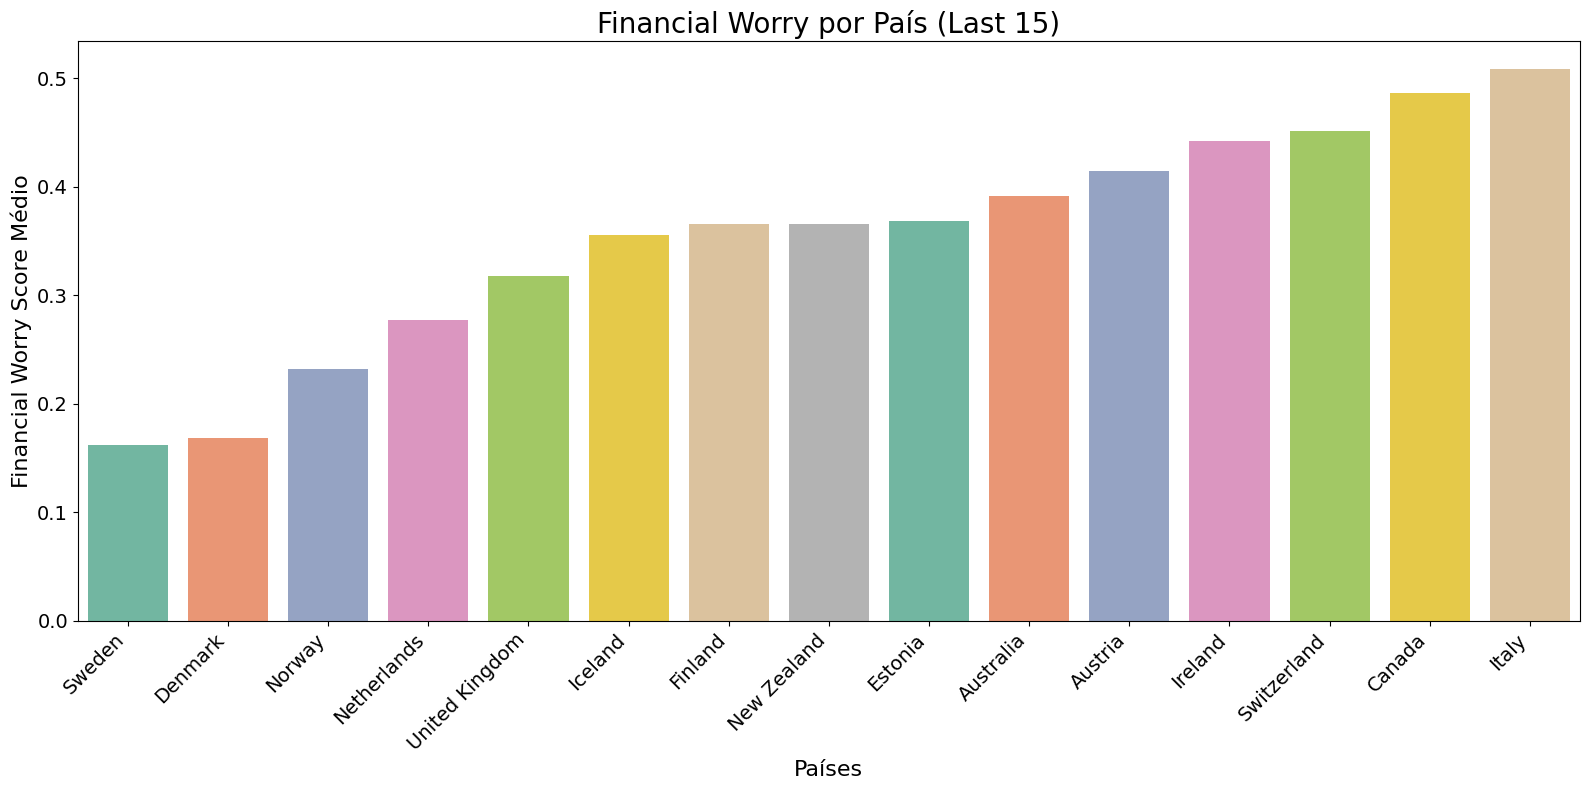

In [33]:
plt.figure(figsize=(16, 8))
region_worry = (
    df.groupby('economy')['financial_worry']
      .mean()
      .sort_values(ascending=True)
      .head(15)
)
sns.barplot(x=region_worry.index, y=region_worry.values, palette='Set2')
plt.title('Financial Worry por País (Last 15)', fontsize=20)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Financial Worry Score Médio', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

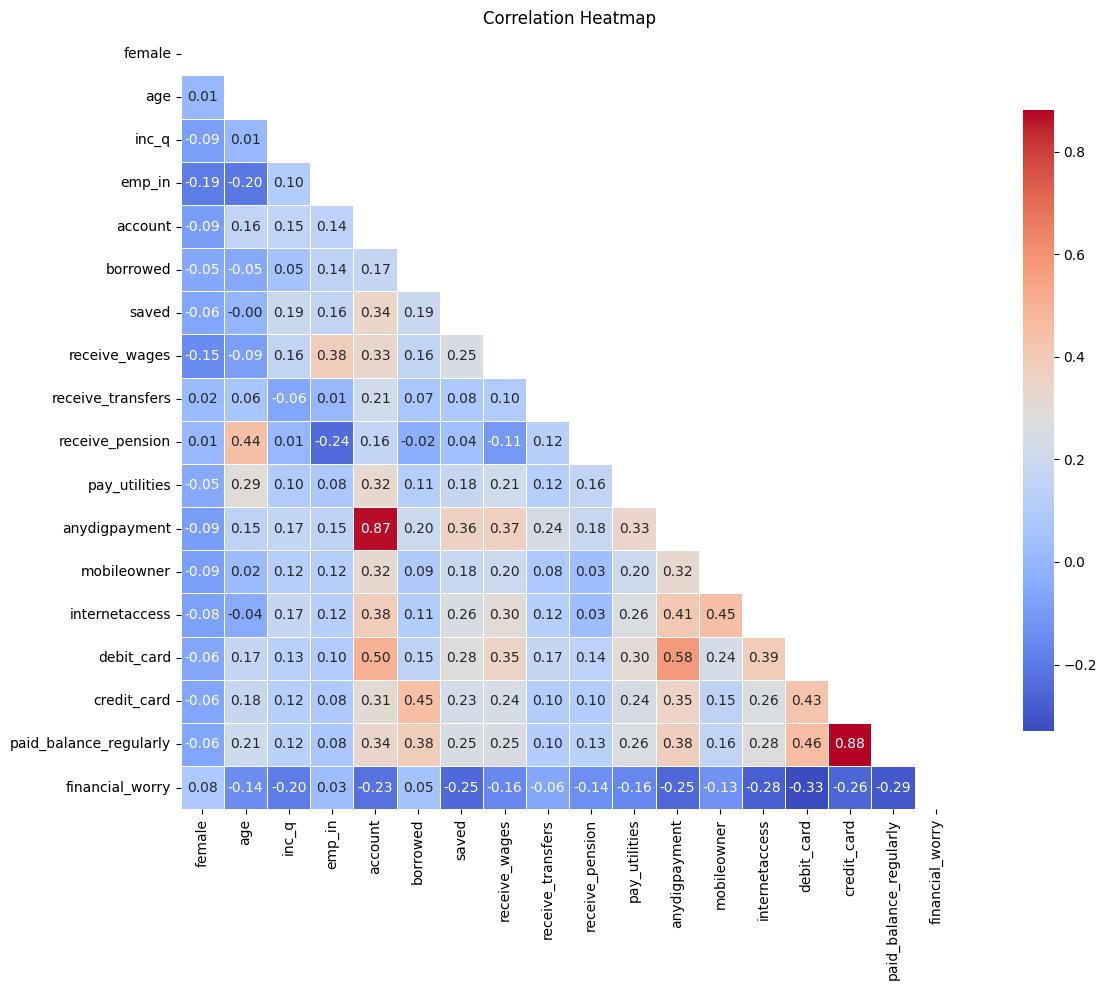

In [34]:
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [67]:
bins = [-0.5,  0.52,  2.23,  3.5]
labels = ['Baixo', 'Moderado', 'Alto']

df['worry_level'] = pd.cut(
    df['financial_worry'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [68]:
df['worry_level'].value_counts()

worry_level
Moderado    58554
Baixo       42345
Alto        38465
Name: count, dtype: int64

In [69]:
df.drop(columns=['financial_worry'], inplace=True)

In [70]:
# one-hot encoding
df = pd.get_dummies(df, columns=['economy'], drop_first=True)

In [71]:
df.to_csv('../data/cleaned_data_dummies.csv', index=False)

In [22]:
[col for col in df.columns if "china" in col.lower()]

['economy_Hong Kong SAR, China', 'economy_Taiwan, China']

In [41]:
df['worry_level'].value_counts()

worry_level
Baixo       69231
Alto        44845
Moderado    25288
Name: count, dtype: int64